В этом задании мы будем работать с датасетом, в котором приведены данные
по мошенничеству с кредитными данными:Credit Card Fraud Detection (информация об авторах: Andrea Dal Pozzolo, 
Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling 
                                                                   
Посчитайте с помощью метода value_counts количество наблюдений для каждого значения целевой
переменной Class и примените к полученным данным метод plot, чтобы построить столбчатую диаграмму.
Затем постройте такую же диаграмму, используя логарифмический масштаб.                                                                                                                                        for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015).

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
DATASET_PATH = '///Users/polzovatel/Python_Library/creditcard.csv'

In [6]:
df = pd.read_csv(DATASET_PATH, sep = ',')
df.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0


Посчитайте с помощью метода value_counts количество наблюдений для каждого значения целевой переменной 
Class и примените к полученным данным метод plot, чтобы построить столбчатую диаграмму. Затем постройте
такую же диаграмму, используя логарифмический масштаб.


In [7]:
t=df['Class'].value_counts()
t

0    284315
1       492
Name: Class, dtype: int64

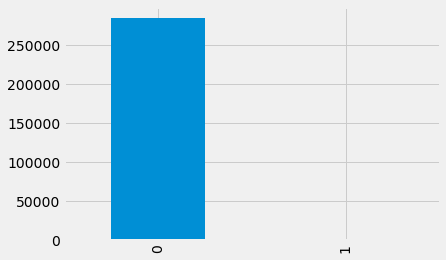

In [9]:
df_class_info = pd.Series(t)
df_class_info.plot(kind='bar')
plt.show()

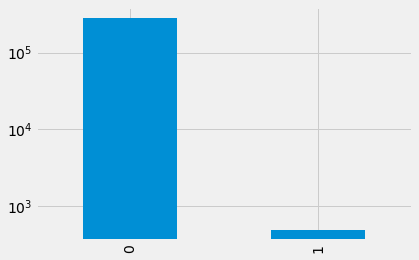

In [10]:
df_class_info.plot(kind='bar', logy=True)
plt.show()

На следующем графике постройте две гистограммы по значениям признака V1 - одну для мошеннических 
транзакций (Class равен 1) и другую - для обычных (Class равен 0). Подберите значение аргумента density так, 
чтобы по вертикали графика было расположено не число наблюдений, а плотность распределения. 
Число бинов должно равняться 20 для обеих гистограмм, а коэффициент alpha сделайте равным 0.5, 
чтобы гистограммы были полупрозрачными и не загораживали друг друга. 

In [11]:
v1_class1=df.set_index('Class')['V1'].filter(like='1', axis=0)
v1_class1=v1_class1.reset_index()
v1_class1=v1_class1.drop('Class', axis=1)
v1_class1.head(), v1_class1.count()

(         V1
 0 -2.312227
 1 -3.043541
 2 -2.303350
 3 -4.397974
 4  1.234235,
 V1    492
 dtype: int64)

In [12]:
v1_class0=df.set_index('Class')['V1'].filter(like='0', axis=0)
v1_class0=v1_class0.reset_index()
v1_class0=v1_class0.drop('Class', axis=1)
v1_class0.head(), v1_class0.count()

(         V1
 0 -1.359807
 1  1.191857
 2 -1.358354
 3 -0.966272
 4 -1.158233,
 V1    284315
 dtype: int64)

Создайте легенду с двумя значениями:
“Class 0” и “Class 1”. Гистограмма обычных транзакций должна быть серого цвета, а мошеннических - красного. 
Горизонтальной оси дайте название “V1”.

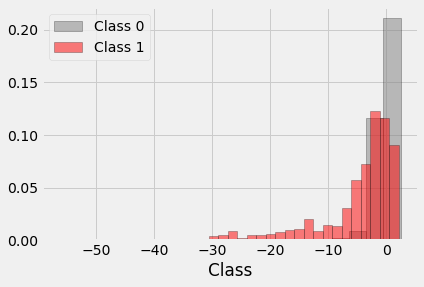

In [19]:
plt.hist(v1_class0['V1'], bins=20, color='grey', edgecolor='black', density = True, orientation= 'vertical', alpha = 0.5)
plt.hist(v1_class1['V1'], bins=20, color='red', edgecolor='black', density = True, orientation= 'vertical', alpha = 0.5)
plt.plot()
plt.xlabel('Class')
plt.legend(labels=['Class 0', 'Class 1'])